# <center>DETECTION & CLASSIFICATION OF PCOD/PCOS

> ### <center>Athulya Shanty - 2048030

> ### About PCOD/PCOS
>Polycystic ovarian syndrome or disease (PCOS/PCOD) is a hormonal disorder that affects women in their reproductive age. PCOS is a common health condition that affects teen and young women.It can cause problems with menstrual periods and make it difficult for her to conceive. The principal features include no ovulation, irregular periods, acne and hirsutism. If not treated it can cause insulin resistant diabetes, obesity and high cholesterol leading to heart disease.

> ### About the Data
>The data is collected from people(females) living across the world. The source of data collection was primary
and was carried out using Google forms. The google form contained 6 sections such as the main section,Personal details,Symptoms,Personal details & history, lifestyle and Medical history.

>### <center>Importing required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, roc_curve, auc
from sklearn import neighbors
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

>### <center>Loading Dataset

In [2]:
#Reading the dataset
df=pd.read_excel(r'E:\files\Desktop\2MDS\MACHINE_LEARNING\projects\uncleaned_data.xlsx')
df.head()

,Timestamp,What is your name?,Select your Gender,Pick your age limit,How would you describe your Body Physic ?,Have you done an ultrasound abdomen scanning and what does your report say?,Do you notice any of these right before your period begins?,Are you experiencing irregular or late periods?,Are you experiencing painful periods?,Are you experiencing Excessive bleeding?,...,Do you exercise regularly?,Is your mother diagnosed with PCOS/PCOD?,Do you suffer from diabetes?,Do you suffer from Hypothyroidism?,Do you experience excessive growth of facial and body hair?,Do you have Acne/ Hyper-pigmentation?,What is your marital status,How many kids do you have?,Which work profile matches yours?,Are you diagnosed with PCOD/PCOS?
0,2021-04-06 20:36:51.022,Merin,Female,19-34,I am at a healthy weight,No scanning was done,Mood swings,Yes,Yes,Yes,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
1,2021-04-06 20:37:07.277,Sophya jayaraj,Female,19-34,I am at a healthy weight,No scanning was done,Bloating,No,Yes,No,...,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN
2,2021-04-06 20:37:23.643,NEENA RAJAN,Female,19-34,I am at a healthy weight,No scanning was done,None,No,No,No,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
3,2021-04-06 20:37:23.938,Dhamini Nijgal,Female,19-34,I am a bit overweight,No scanning was done,Mood swings,Yes,Yes,Yes,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
4,2021-04-06 20:37:56.015,Ashritha,Female,19-34,I am obese,Normal results,Constipation,No,No,Yes,...,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN


> ### <center>DATA CLEANING
>1.Renaming lengthy column names

>2.Removing Duplicates
    
>3.Removal of Unwanted observations and variables

>4.Handling Missing Data

>5.Splitting the dataset into 2 dataframes for modeling and prediction.

>6.Exporting the cleaned modeling and predicting dataframes to Excel.

>#### 1.Renaming lengthy column names

>For convenience let's rename the longer columns to shorter

In [3]:
renamed={'What is your name? ':'name',
         'Select your Gender':'gender',
         'Pick your age limit':'age',
         'How would you describe your Body Physic ?':'body_type',
         'Have you done an ultrasound abdomen scanning and what does your report say?':'scanning',
         'Do you notice any of these right before your period begins?':'before_period',
         'Are you experiencing irregular or late periods?':'irregular_period',
         'Are you experiencing painful periods?':'painful_period',
         'Are you experiencing  Excessive bleeding?':'bleeding',
         'How often do you get your periods?':'period_cycle',
         'How long does your period last?':'period_duration',
         'How would you like to rate your period pains':'period_pain',
         'Do you notice any clots during your periods?':'clots',
         'Do you have the habit of consuming alcohol?':'alcohol',
         'Do you have the habit of smoking?':'smoking',
         'Are you under any stress?':'stress',
         'Do you exercise regularly?':'exercise',
         'Is your mother diagnosed with PCOS/PCOD?':'Hereditary',
         'Do you suffer from diabetes?':'diabetes',
         'Do you suffer from Hypothyroidism?':'hypothyroidism',
         'Do you experience excessive growth of facial and body hair?':'hair_growth',
         'Do you have Acne/ Hyper-pigmentation?':'acne',
         'What is your marital status':'marital_status',
         'How many kids do you have?':'kids',
         'Which work profile matches yours?':'work',
         'Are you diagnosed with PCOD/PCOS?':'diagnosis'}

In [4]:
df.rename(renamed, axis='columns', inplace=True)
df.head()

,Timestamp,name,gender,age,body_type,scanning,before_period,irregular_period,painful_period,bleeding,...,exercise,Hereditary,diabetes,hypothyroidism,hair_growth,acne,marital_status,kids,work,diagnosis
0,2021-04-06 20:36:51.022,Merin,Female,19-34,I am at a healthy weight,No scanning was done,Mood swings,Yes,Yes,Yes,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
1,2021-04-06 20:37:07.277,Sophya jayaraj,Female,19-34,I am at a healthy weight,No scanning was done,Bloating,No,Yes,No,...,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN
2,2021-04-06 20:37:23.643,NEENA RAJAN,Female,19-34,I am at a healthy weight,No scanning was done,None,No,No,No,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
3,2021-04-06 20:37:23.938,Dhamini Nijgal,Female,19-34,I am a bit overweight,No scanning was done,Mood swings,Yes,Yes,Yes,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
4,2021-04-06 20:37:56.015,Ashritha,Female,19-34,I am obese,Normal results,Constipation,No,No,Yes,...,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN


> #### 2.Removing Duplicates

In [5]:
df.shape

(882, 27)

>There are 882 observations and 27 variables.

In [6]:
#Removing duplicates
df=df.drop_duplicates(subset=['name'])
df.shape

(763, 27)

In [7]:
882-763

119

> Out of 882 records, 119 records were duplicates and they have been removed.

>#### 3.Removal of Unwanted observations and variables

In [8]:
#Removing males and other categories from gender variable.
df.drop(df[df['gender'] == 'Male'].index, inplace = True)
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [9]:
df.shape

(723, 27)

>Males and others have been removed from the dataset. The new dataset consists of only females.

In [10]:
df=df.drop(['Timestamp','name','gender'],axis=1)
df.shape

(723, 24)

>Unwanted columns were removed from the dataset.

>Now let's have a look on the resultant dataset

In [11]:
df.head(10)

,age,body_type,scanning,before_period,irregular_period,painful_period,bleeding,period_cycle,period_duration,period_pain,...,exercise,Hereditary,diabetes,hypothyroidism,hair_growth,acne,marital_status,kids,work,diagnosis
0,19-34,I am at a healthy weight,No scanning was done,Mood swings,Yes,Yes,Yes,21-40 days,5-7 days,Severe,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
1,19-34,I am at a healthy weight,No scanning was done,Bloating,No,Yes,No,21-40 days,Less than 3 days,Moderate,...,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN
2,19-34,I am at a healthy weight,No scanning was done,None,No,No,No,21-40 days,5-7 days,Moderate,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
3,19-34,I am a bit overweight,No scanning was done,Mood swings,Yes,Yes,Yes,21-40 days,3-5 days,Severe,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
4,19-34,I am obese,Normal results,Constipation,No,No,Yes,21-40 days,3-5 days,Moderate,...,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN
5,19-34,I am obese,No scanning was done,Breast pain,No,Yes,No,21-40 days,5-7 days,Severe,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
6,19-34,I am at a healthy weight,No scanning was done,Diarrhoea,No,Yes,No,21-40 days,3-5 days,Moderate,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
8,19-34,I am at a healthy weight,Normal results,None,No,No,No,21-40 days,5-7 days,Mild,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
9,19-34,I am at a healthy weight,Cysts in overy,Mood swings,Yes,Yes,Yes,More than 40 days,5-7 days,Moderate,...,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN
10,19-34,I am at a healthy weight,I don't remember,Headache,Yes,Yes,Yes,21-40 days,5-7 days,Severe,...,No,No,No,No,Yes,No,NaN,NaN,NaN,NaN


In [12]:
df.shape

(723, 24)

>#### 4.Handling Missing Data

In [13]:
#Checking missing values
df.isna().sum()

age                   0
body_type             0
scanning              0
before_period         0
irregular_period      0
painful_period        0
bleeding              0
period_cycle          0
period_duration       0
period_pain           0
clots                 0
alcohol               0
smoking               0
stress                0
exercise              0
Hereditary            0
diabetes              0
hypothyroidism        0
hair_growth           0
acne                  0
marital_status      289
kids                290
work                293
diagnosis           405
dtype: int64

>Missing values found! Let's handle the missing values

In [14]:
#Filling missing values with 'unknown'
df['marital_status']=df['marital_status'].fillna('unknown')
df['work']=df['work'].fillna('unknown')
df['kids']=df['kids'].fillna('unknown')
df['diagnosis']=df['diagnosis'].fillna('Didnt check')

In [15]:
#Converting 'kids' column to string 
df.loc[df['kids'].isin([0]), 'kids'] = 'zero'
df.loc[df['kids'].isin([1]), 'kids'] = 'one'
df.loc[df['kids'].isin([2]), 'kids'] = 'two'

>Missing values are filled with 'unknown'. Also, the 'kids' column has been coverted to string as it contained both strings and numericals.

In [16]:
df.isna().sum()

age                 0
body_type           0
scanning            0
before_period       0
irregular_period    0
painful_period      0
bleeding            0
period_cycle        0
period_duration     0
period_pain         0
clots               0
alcohol             0
smoking             0
stress              0
exercise            0
Hereditary          0
diabetes            0
hypothyroidism      0
hair_growth         0
acne                0
marital_status      0
kids                0
work                0
diagnosis           0
dtype: int64

>No more missing values are found!

In [17]:
df.shape

(723, 24)

>We have a total of 723 observations with 24 variables after data cleaning.

>#### 5.Splitting the dataset into 2 dataframes for modeling and prediction.

>We have some observations with both dependent and independent variable whereas some have only independent variables. Let's first split them to modeling data(df1) and predicting data(df2)

In [18]:
df2=df1=df

In [19]:
#Data for prediction
df1=df1[df1['diagnosis'] == 'Didnt check']
#Dropping diagnosis column of predictive dataset as it contains only 'Didnt check'
df1=df1.drop(['diagnosis'],axis=1)
df1.shape

(511, 23)

>We have 511 observations with 23 independent variables for prediction

In [20]:
#Data for modeling
df2.drop(df2[df2['diagnosis'] == 'Didnt check'].index, inplace = True)
df2.shape

(212, 24)

>We have 212 observations with 23 independent and 1 dependent variable for modeling

>#### 6.Exporting the cleaned modeling and predicting dataframes to Excel.

In [21]:
df.to_excel(r'E:\files\Desktop\2MDS\MACHINE_LEARNING\projects\datacleaned.xlsx')

> ### <center>DATA PREPROCESSING
>1.Finding the numerical and categorical variables

>2.Converting Categorical variables to numerical

>3.Splitting the dataset into the dependent and independent variables y and X respectively for modelling

>#### 1.Finding the numerical and categorical variables

In [22]:
# list of numerical variables
numerical = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical))

print(numerical)

Number of numerical variables:  0
[]


In [23]:
#list of categorical variables
categorical=[]
for col in df.select_dtypes(include='object').columns:
    categorical.append(col)
print('Number of categorical variables: ', len(categorical))
print(categorical)

Number of categorical variables:  24
['age', 'body_type', 'scanning', 'before_period', 'irregular_period', 'painful_period', 'bleeding', 'period_cycle', 'period_duration', 'period_pain', 'clots', 'alcohol', 'smoking', 'stress', 'exercise', 'Hereditary', 'diabetes', 'hypothyroidism', 'hair_growth', 'acne', 'marital_status', 'kids', 'work', 'diagnosis']


>There are no numerical variable in the dataset. There are 24 categorical variables in the dataset

>#### 2.Converting Categorical variables to numerical

In [24]:
#Label Encoding for categorical variables in df1
from sklearn import preprocessing
for i in range(0,(len(categorical)-1)):
    le=preprocessing.LabelEncoder()
    le.fit(df1[categorical[i]])
    df1[categorical[i]]=le.transform(df1[categorical[i]])

In [25]:
#Label Encoding for categorical variables in df2
from sklearn import preprocessing
for i in range(0,len(categorical)):
    le=preprocessing.LabelEncoder()
    le.fit(df2[categorical[i]])
    df2[categorical[i]]=le.transform(df2[categorical[i]])

>The categorical variables have been converted to numerical by label encoding in both df1 and df2

>#### 3.Splitting the modeling dataset (df2) into the dependent and independent variables y and X for modelling

In [26]:
y=df2["diagnosis"]
X=df2.drop(['diagnosis'],axis=1)
print('The dependent variable is diagnosis and the independent variables are ',list(X.columns))

The dependent variable is diagnosis and the independent variables are  ['age', 'body_type', 'scanning', 'before_period', 'irregular_period', 'painful_period', 'bleeding', 'period_cycle', 'period_duration', 'period_pain', 'clots', 'alcohol', 'smoking', 'stress', 'exercise', 'Hereditary', 'diabetes', 'hypothyroidism', 'hair_growth', 'acne', 'marital_status', 'kids', 'work']


> ### <center>DATA EXPLORATION
>1.Displaying first 10 rows of the modelling dataset

>2.Finding the shape of the dataframe to be modelled

>3.Information of the dataframe to be modelled

>4.Plotting each variable with its unique values and frequency in the bar plot

>5.Check for correlation

>6.Feature Selection

> #### 1.Displaying first 10 rows of the modelling dataset

In [27]:
df2.head(10)

,age,body_type,scanning,before_period,irregular_period,painful_period,bleeding,period_cycle,period_duration,period_pain,...,exercise,Hereditary,diabetes,hypothyroidism,hair_growth,acne,marital_status,kids,work,diagnosis
484,0,0,0,5,1,0,0,2,1,1,...,0,0,0,1,0,1,1,3,0,1
486,0,1,2,5,1,1,0,1,1,1,...,0,0,0,0,0,0,1,3,0,0
487,0,0,0,5,1,0,0,2,2,1,...,0,0,0,0,1,0,1,3,1,1
489,0,1,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,0
490,0,1,2,5,1,1,0,0,0,3,...,0,0,0,0,1,1,1,3,1,0
491,1,3,2,0,1,1,0,0,1,1,...,1,0,0,0,0,0,0,2,0,0
494,0,1,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,3,1,0
498,0,0,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,3,1,0
499,3,1,3,5,1,0,0,0,1,1,...,0,0,0,0,0,0,1,3,1,0
500,1,1,3,6,0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,0,0


> #### 2.Finding the shape of the dataframe to be modelled

In [28]:
df2.shape

(212, 24)

> #### 3.Information of the dataframe to be modelled

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 484 to 878
Data columns (total 24 columns):
age                 212 non-null int32
body_type           212 non-null int32
scanning            212 non-null int32
before_period       212 non-null int32
irregular_period    212 non-null int32
painful_period      212 non-null int32
bleeding            212 non-null int32
period_cycle        212 non-null int32
period_duration     212 non-null int32
period_pain         212 non-null int32
clots               212 non-null int32
alcohol             212 non-null int32
smoking             212 non-null int32
stress              212 non-null int32
exercise            212 non-null int32
Hereditary          212 non-null int32
diabetes            212 non-null int32
hypothyroidism      212 non-null int32
hair_growth         212 non-null int32
acne                212 non-null int32
marital_status      212 non-null int32
kids                212 non-null int32
work                212 non-null in

> #### 4.Plotting each variable with its unique values and frequency in the bar plot

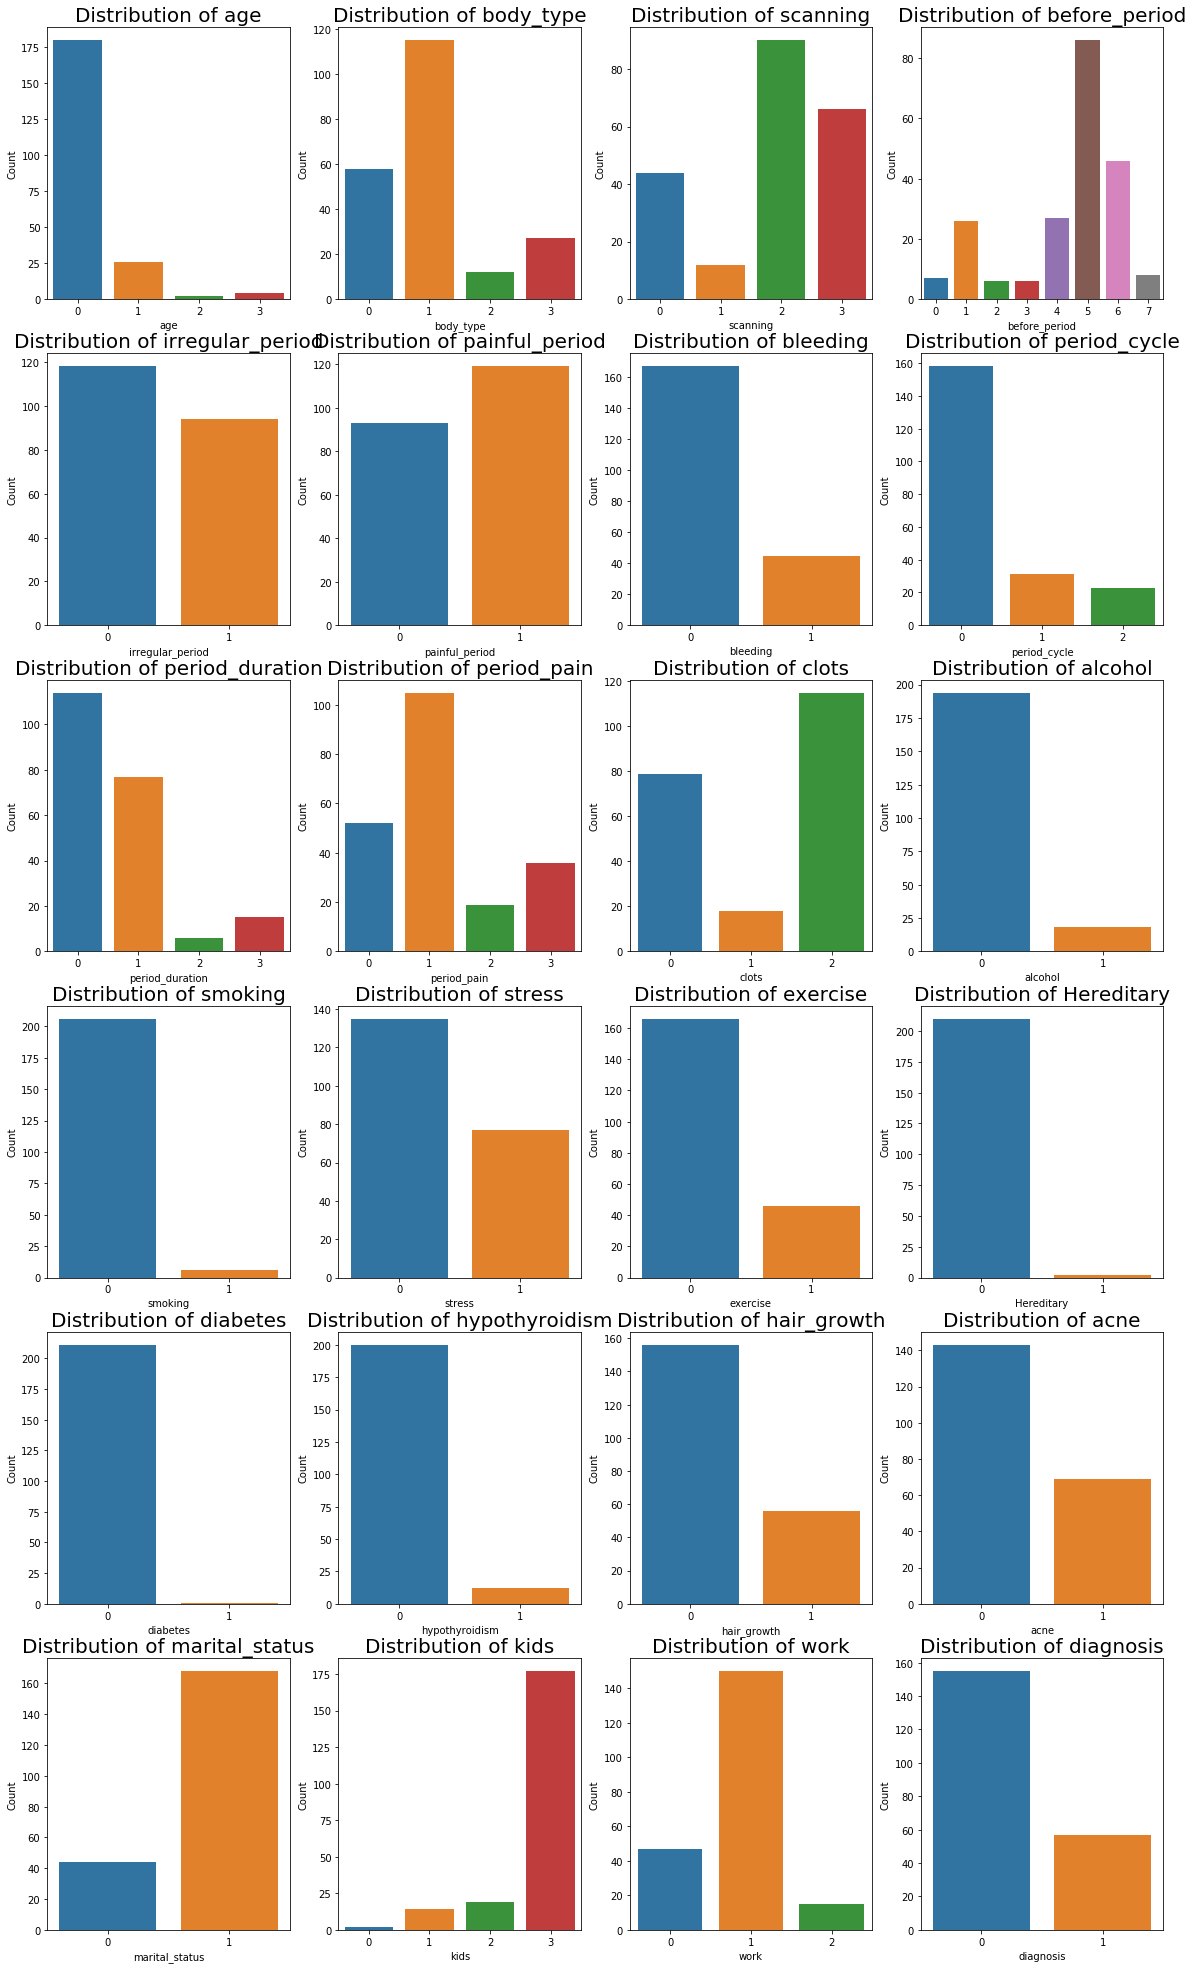

In [30]:
import warnings
warnings.filterwarnings('ignore')
col=list(df2.columns)
plt.rcParams['figure.figsize'] = (20, 35)
plotnumber =1
for i in range (0,len(col)):
    plt.subplot(6, 4, plotnumber)
    sns.countplot(df2[col[i]])
    str='Distribution of '+col[i]
    plt.title(str, fontsize = 20)
    plt.xlabel(col[i])
    plt.ylabel('Count')
    plotnumber+=1

> #### 5.Check for correlation

Text(0.5,1,'Heat Map')

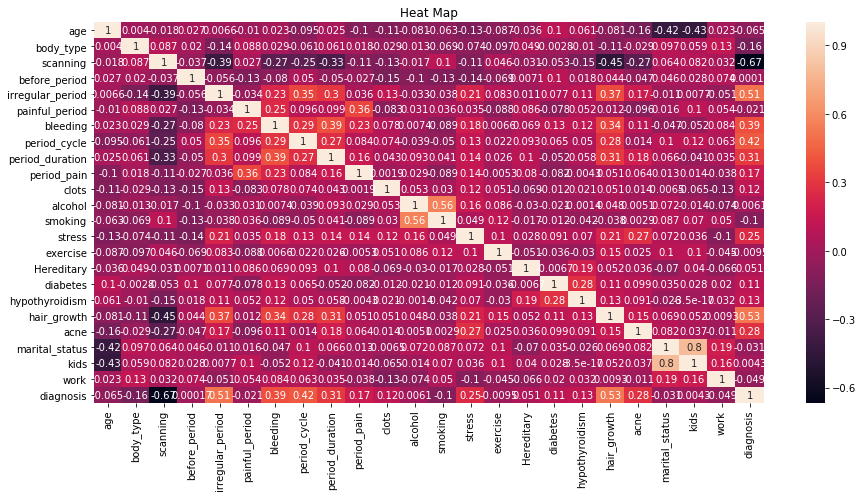

In [31]:
## Checking for correlation
import matplotlib.pyplot as plt
import seaborn as sns
cor_mat=df2.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.title('Heat Map')

> #### 6.Feature Selection

In [32]:
cor=df2.corr()
cor_target = abs(cor['diagnosis'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
print('There are ',(len(relevant_features)-1),'relevant features out of which diagnosis is the target variable')
relevant_features[0:(len(relevant_features)-1)]


There are  8 relevant features out of which diagnosis is the target variable


scanning            0.666752
irregular_period    0.508112
bleeding            0.387688
period_cycle        0.417865
period_duration     0.314478
stress              0.249914
hair_growth         0.529517
acne                0.282646
Name: diagnosis, dtype: float64

In [33]:
relevant_features=['scanning','irregular_period','bleeding','period_cycle','stress','hair_growth','acne']
print(relevant_features)

['scanning', 'irregular_period', 'bleeding', 'period_cycle', 'stress', 'hair_growth', 'acne']


> ### <center>DATA MODELING
>1.Splitting modeling dataset into training and testing data

>2.Training and testing the modeling dataset using Naive Bayesian classifier.

>3.Model Evaluation of Naive Bayesian Classifier

>4.Training and testing the modeling dataset using Logistic regression.

>5.Model Evaluation of Logistic Regression

>6.Training and testing the modeling dataset using KNN.

>7.Model Evaluation of KNN

>8.Training and testing the modeling dataset using Random Forest Classifier.

>9.Model Evaluation of Random Forest Classifier

>10.Training and testing the modeling dataset using Decision Tree.

>11.Model Evaluation of Decision Tree

>12.Finding the best model

>#### 1.Splitting modeling dataset into training and testing

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
X_train.shape

(169, 23)

In [36]:
X_test.shape

(43, 23)

>#### 2.Training and testing the modeling dataset using Naive Bayes classifier.


In [37]:
#Naive Bayesian Classifier
clf=GaussianNB()
model=clf.fit(X_train,y_train)
y_pred=model.predict(X_test)
ac=accuracy_score(y_test,y_pred,normalize=True)
a=np.round(ac*100,2)
print('Accuracy is ',a,'%')

Accuracy is  88.37 %


>#### 3.Model Evaluation of Naive Bayesian Classifier

Score in Test Data : 0.8837209302325582
Right classification : 38
Wrong classification : 5


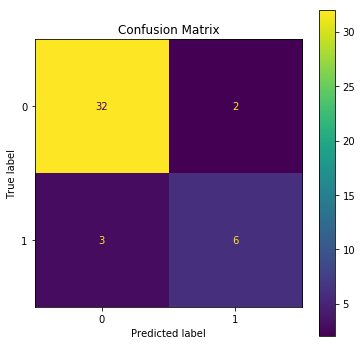

In [38]:
#Model Evaluation of Naive Bayesian Classifier
plt.rcParams['figure.figsize'] = (6, 6)
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")

plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

>#### 4.Training and testing the modeling dataset using Logistic regression.

In [39]:
#Logistic Regression
clf=LogisticRegression()
model=clf.fit(X_train,y_train)
y_pred=model.predict(X_test)
ac=accuracy_score(y_test,y_pred,normalize=True)
b=np.round(ac*100,2)
print('Accuracy is ',b,'%')

Accuracy is  90.7 %


>#### 5.Model Evaluation of Logistic Regression

Score in Test Data : 0.9069767441860465
Right classification : 39
Wrong classification : 4


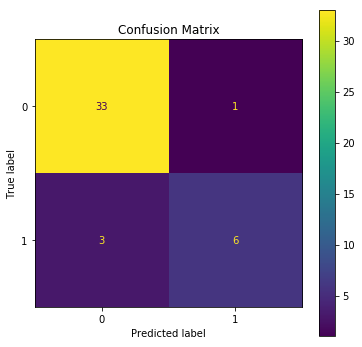

In [40]:
#Model Evaluation of logistic Regression
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")

plot_confusion_matrix(clf, X_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

>#### 6.Training and testing the modeling dataset using KNN.

In [41]:
#KNN
clf=neighbors.KNeighborsClassifier(n_neighbors=3)
model=clf.fit(X_train,y_train)
y_pred=model.predict(X_test)
ac=accuracy_score(y_test,y_pred,normalize=True)
c=np.round(ac*100,2)
print('Accuracy is ',c,'%')

Accuracy is  90.7 %


>#### 7.Model Evaluation of KNN

Score in Test Data : 0.9069767441860465
Right classification : 39
Wrong classification : 4


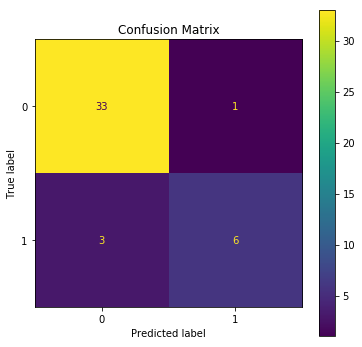

In [42]:
#Model Evaluation of KNN
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")

plot_confusion_matrix(clf, X_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

>#### 8.Training and testing the modeling dataset using Random Forest Classifier

In [43]:
#Random Forest Classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
model=clf.fit(X_train, y_train)
y_pred=model.predict(X_test)
ac=accuracy_score(y_test,y_pred,normalize=True)
d=np.round(ac*100,2)
print('Accuracy is ',d,'%')

Accuracy is  88.37 %


>#### 9.Model Evaluation of Random Forest Classifier

Score in Test Data : 0.8837209302325582
Right classification : 38
Wrong classification : 5


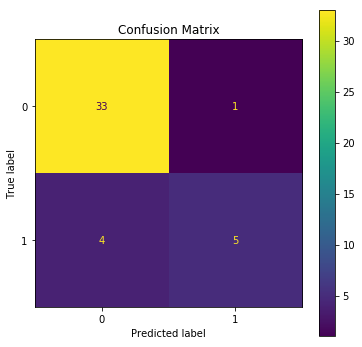

In [44]:
#Model Evaluation of Random Forest Classifier
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")

plot_confusion_matrix(clf, X_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

>#### 10.Training and testing the modeling dataset using Decision Tree

In [45]:
#Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=4)
model = clf.fit(X_train, y_train)
y_pred=model.predict(X_test)
ac=accuracy_score(y_test,y_pred,normalize=True)
e=np.round(ac*100,2)
print('Accuracy is ',e,'%')

Accuracy is  88.37 %


In [46]:
import graphviz
with open("DecisionTree.dot",'w') as f:
    f=tree.export_graphviz(model,feature_names=X.columns,out_file=f);

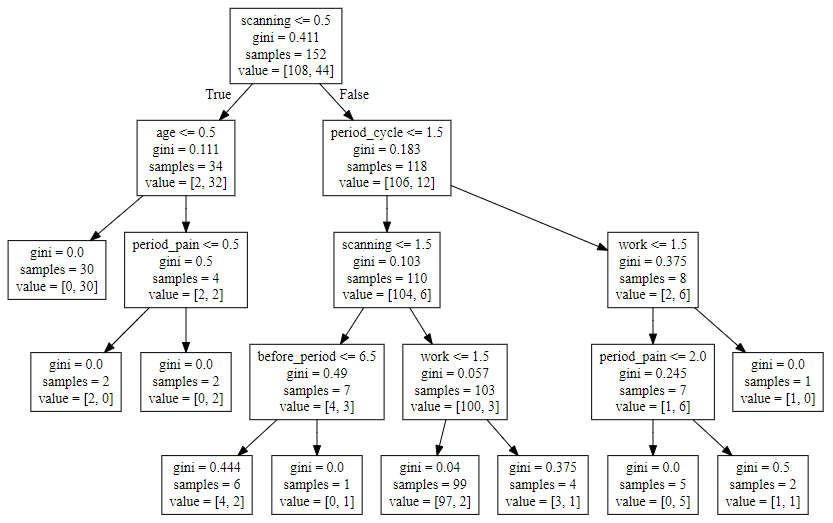

>#### 11.Model Evaluation of Decision Tree

Score in Test Data : 0.8837209302325582
Right classification : 38
Wrong classification : 5


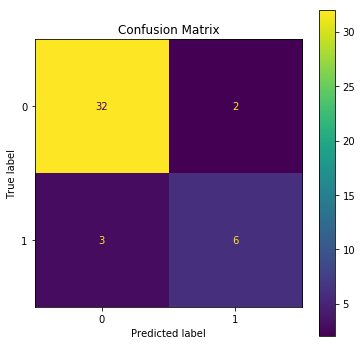

In [47]:
#Model Evaluation of Decision Tree
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")

plot_confusion_matrix(clf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

> #### 12. FInding the best model

In [48]:
dictionary={'Algorithm':['Naive Bayesian Classifier','Logistic regression','KNN','Random Forest Classifier','Decision Tree Classifier'],
          'Accuracy':[a,b,c,d,e]}
n=pd.DataFrame(dictionary)
n.sort_values(by=['Accuracy'],ascending=False)

,Accuracy,Algorithm
1,90.70,Logistic regression
2,90.70,KNN
0,88.37,Naive Bayesian Classifier
3,88.37,Random Forest Classifier
4,88.37,Decision Tree Classifier


>The best models are Logistic Regression and KNN with accuracy of 90.70%.

> ### <center>MODEL PREDICTION
    
> 1.Assigning the variables (indepedent) of predicting dataset (df1) to the variable X2

> 2.Predicting diagnosis variable of predicting dataset using logistic regression

> 3.Predicting diagnosis variable of predicting dataset using KNN

> 4.Comparing both predictions of diagnosis

>#### 1.Assigning the variables (indepedent) of predicting dataset (df1) to the variable X2

In [49]:
X2=df1
print('The independent variables are ',list(X.columns))

The independent variables are  ['age', 'body_type', 'scanning', 'before_period', 'irregular_period', 'painful_period', 'bleeding', 'period_cycle', 'period_duration', 'period_pain', 'clots', 'alcohol', 'smoking', 'stress', 'exercise', 'Hereditary', 'diabetes', 'hypothyroidism', 'hair_growth', 'acne', 'marital_status', 'kids', 'work']


>#### 2.Predicting diagnosis variable of predicting dataset using logistic regression

In [50]:
#Prediction using Logistic Regression
clf=LogisticRegression()
model=clf.fit(X,y)
y_pred=model.predict(X2)
df3=df1
df4=pd.DataFrame(y_pred)
pred_diag={0:'Predicted Diagnosis'}
df4.rename(pred_diag, axis=1, inplace=True)
df4.head(10)

,Predicted Diagnosis
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


>In the prediction of diagnosis, 1 denotes a female with PCOS/PCOD and 0 denotes a female with no PCOD/PCOS

In [51]:
df4['Predicted Diagnosis'].value_counts()

0    436
1     75
Name: Predicted Diagnosis, dtype: int64

Prediction of diagnosis using Logistic Regression 75 have PCOS/PCOD where as 436 have no PCOD/PCOS.

Text(0.5,1,'Barplot for predicted diagnosis using Logistic Regression')

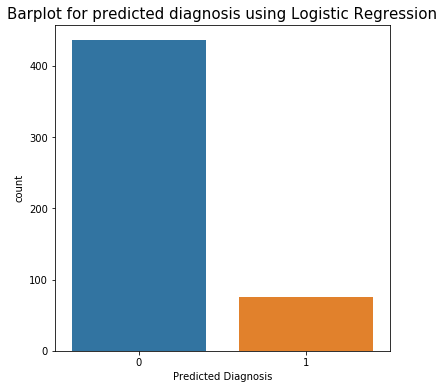

In [60]:
sns.countplot(df4['Predicted Diagnosis'])
plt.title('Barplot for predicted diagnosis using Logistic Regression', fontsize = 15)

In [53]:
df5=pd.concat([df3,df4],axis=1)
df5=df5.dropna()
df5.head(15)

,age,body_type,scanning,before_period,irregular_period,painful_period,bleeding,period_cycle,period_duration,period_pain,...,exercise,Hereditary,diabetes,hypothyroidism,hair_growth,acne,marital_status,kids,work,Predicted Diagnosis
0,0.0,1.0,2.0,5.0,1.0,1.0,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
1,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
2,0.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
3,0.0,0.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
4,0.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
5,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
6,0.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
8,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0
9,0.0,1.0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0
10,0.0,1.0,1.0,4.0,1.0,1.0,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,0.0


>#### 3.Predicting diagnosis variable of predicting dataset using KNN

In [54]:
#Prediction using KNN
clf=neighbors.KNeighborsClassifier(n_neighbors=3)
model=clf.fit(X, y)
y_pred=model.predict(X2)
df6=df1
df7=pd.DataFrame(y_pred)
pred_diag={0:'Predicted Diagnosis'}
df7.rename(pred_diag, axis=1, inplace=True)
df7.head(10)

,Predicted Diagnosis
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [55]:
df7['Predicted Diagnosis'].value_counts()

0    450
1     61
Name: Predicted Diagnosis, dtype: int64

Prediction of diagnosis using KNN 61 have PCOS/PCOD where as 450 have no PCOD/PCOS.

Text(0.5,1,'Barplot for predicted diagnosis using KNN')

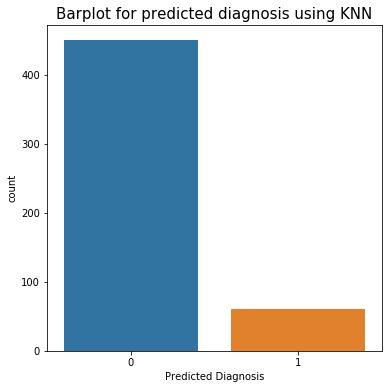

In [61]:
sns.countplot(df7['Predicted Diagnosis'])
plt.title('Barplot for predicted diagnosis using KNN', fontsize = 15)

>In the prediction of diagnosis, 1 denotes a female with PCOS/PCOD and 0 denotes a female with no PCOD/PCOS

In [57]:
df8=pd.concat([df6,df7],axis=1)
df8=df8.dropna()
df8.head(15)

,age,body_type,scanning,before_period,irregular_period,painful_period,bleeding,period_cycle,period_duration,period_pain,...,exercise,Hereditary,diabetes,hypothyroidism,hair_growth,acne,marital_status,kids,work,Predicted Diagnosis
0,0.0,1.0,2.0,5.0,1.0,1.0,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
1,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
2,0.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
3,0.0,0.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
4,0.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
5,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
6,0.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0
8,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0
9,0.0,1.0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,0.0
10,0.0,1.0,1.0,4.0,1.0,1.0,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,0.0


>#### 4.Comparing both predictions of diagnosis

In [58]:
df9=df4==df7
df9['Predicted Diagnosis'].value_counts()

True     485
False     26
Name: Predicted Diagnosis, dtype: int64

>485 results were predicted the same by both the models

>26 results were predicted differently by both the models

> ## INFERENCES

>•	The lengthy column names was renamed to shorter ones.
   
>•	Removing duplicates removed 113 duplicate records and resulted in 763 observations with 27 variables.

>•	Dropping ‘male’ and ‘other’ from gender resulted in 723 observations with 27 variables.
 
>•	Removal of unwanted columns such as ‘Timestamp’, ’name’, etc resulted in 723 observations with 24 variables. 
 
>•	Handling missing data was done by filling the null values with the variable ‘unknown’.
 
>•	The dataset was splitted into 2 data frames. One for training and the other for testing. The observations which had both     dependent and independent variables were added to 1st data frame for testing and the observations with only independent     variables were added to 2nd data frame. The observations in which the response of ‘Didn’t check’ has been added to data     frame 1 for prediction. 
 
>•	The dataset contained 24  categorical variables and no numerical variables.
 
>•	The categorical variables of both the data frames have been converted to numerical by Label Encoding.
 
>•	The count of each value of every variables were plotted in a bar graph. 
 
>•	Correlation heat map has been plotted.
 
>•	The relevant features was found to be   'scanning', 'irregular_period', 'bleeding', 'period_cycle', 'stress',      'hair_growth' and 'acne' through the method of correlation with cut-off as 0.2.
 
>•	The dataset which have both dependent and independent variable was splitted into Xtrain, ytrain, Xtest and ytest for modelling.
 
>•	There were a total of 5 models. They are Naïve Bayesian model, Logistic Regression model, KNN model, Random Forest Classification  model, and Decision Tree model with an accuracy of 88.37%, 90.70%, 90.70%, 88.37% and 86.05% respectively. Confusion matrix for each matrix was plotted.
 
>•	The best models were found to be Logistic Regression and KNN with 90.70% of accuracy.
 
>•	The diagnosis were predicted for the test data using the models with high accuracy. In the prediction of diagnosis, 1 denotes a female with PCOS/PCOD and 0 denotes a female with no PCOD/PCOS


>•Prediction of diagnosis using Logistic Regression 75 have PCOS/PCOD where as 436 have no PCOD/PCOS.


>•Prediction of diagnosis using KNN 61 have PCOS/PCOD where as 450 have no PCOD/PCOS.
 
 
>•	The diagnosis predicted by both the Logistic Regression model and KNN model were compared. 485 predictions were predicted the same by both the models and 26 predictions were predicted differently by both the models.
